In [568]:
#Import libraries
import pandas as pd
import numpy as np
import gensim.downloader as api
from gensim.models import Word2Vec
from transformers import pipeline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
import time;
import logging;
import multiprocessing;
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity


In [569]:
#Read in 'twitter_df'
twitter_df = pd.read_csv("../dataset/twitter_df.csv")

In [570]:
twitter_df.shape

(22153, 8)

In [571]:
twitter_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [572]:
twitter_df['cleaned_tweets'] = twitter_df['cleaned_tweets'].str.strip()

In [573]:
twitter_df = twitter_df[twitter_df['cleaned_tweets'].str.count(' ')  > 5]

In [575]:
len(twitter_df[twitter_df.duplicated("tweets")])

2564

In [576]:
# originaltweets =twitter_df.drop_duplicates(subset=['tweets'], keep='first').reset_index(drop=True)

In [577]:
originaltweets = twitter_df[~twitter_df['tweets'].str.contains('RT')]

In [578]:
originaltweets = originaltweets.reset_index(drop=True)

In [579]:
originaltweets =originaltweets.drop_duplicates(subset=['cleaned_tweets'], keep='first').reset_index(drop=True)

In [580]:
originaltweets['cleaned_tweets'].value_counts().sort_values()

rise slowly becoming normal mean need remote training also growing benefit challenge best practice come successfully training remote employee    1
trend show sign slowing check best practice control cost concur                                                                                  1
nira hiring remotely integration engineer python data analysis oauth remote apply                                                                1
employer continues tool adopting boost engagement check remote work productivity tool know contributor lucas campbell                            1
catercow looking customer service rep offer health benefit equipment provided detail                                                             1
                                                                                                                                                ..
keep talent insideout community share idea help retain staff turnover tsunami                                         

In [581]:
originaltweets =originaltweets.drop([2273,199]).reset_index(drop=True)

In [582]:
originaltweets[originaltweets['cleaned_tweets'].isnull()]

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity


In [583]:
X = originaltweets['cleaned_tweets'].str.split().tolist()
X

[['rise',
  'slowly',
  'becoming',
  'normal',
  'mean',
  'need',
  'remote',
  'training',
  'also',
  'growing',
  'benefit',
  'challenge',
  'best',
  'practice',
  'come',
  'successfully',
  'training',
  'remote',
  'employee'],
 ['opportunity',
  'join',
  'fantastic',
  'team',
  'tech',
  'fast',
  'paced',
  'company',
  'transforming',
  'entire',
  'indus',
  'check',
  'remote',
  'principal',
  'engineer',
  'role',
  'working',
  'golang',
  'python',
  'ruby'],
 ['good',
  'news',
  'open',
  'excellent',
  'report',
  'remote',
  'advert',
  'soaring',
  'provides',
  'encouragement',
  'seeker',
  'australia',
  'share',
  'remote',
  'job',
  'indust'],
 ['tool', 'save', 'google', 'meet', 'tool', 'created', 'love', 'want', 'know'],
 ['would', 'consider', 'outsourcing', 'project', 'someone', 'never', 'person'],
 ['trend',
  'show',
  'sign',
  'slowing',
  'check',
  'best',
  'practice',
  'control',
  'cost',
  'concur'],
 ['nira',
  'hiring',
  'remotely',
  'in

### Word2Vec

In [584]:
#https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57
start = time.time();
#Set the logging format to get some basic updates.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)
# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 100;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words
# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.
print("Training model...");
model = word2vec.Word2Vec(X, workers=num_workers, \
            vector_size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);
# Save the model
model_name = "model_full_reddit";
model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

2021-07-31 21:42:27,070 : INFO : collecting all words and their counts
2021-07-31 21:42:27,077 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-31 21:42:27,097 : INFO : collected 9551 word types from a corpus of 85222 raw words and 7109 sentences
2021-07-31 21:42:27,098 : INFO : Creating a fresh vocabulary
2021-07-31 21:42:27,104 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=100 retains 132 unique words (1.382054235158622%% of original 9551, drops 9419)', 'datetime': '2021-07-31T21:42:27.104054', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-07-31 21:42:27,105 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=100 leaves 32903 word corpus (38.608575250522165%% of original 85222, drops 52319)', 'datetime': '2021-07-31T21:42:27.105535', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n

Training model...


2021-07-31 21:42:27,278 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-31 21:42:27,279 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-07-31 21:42:27,279 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-31 21:42:27,280 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-31 21:42:27,280 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-31 21:42:27,280 : INFO : EPOCH - 5 : training on 85222 raw words (15435 effective words) took 0.0s, 753386 effective words/s
2021-07-31 21:42:27,281 : INFO : Word2Vec lifecycle event {'msg': 'training on 426110 raw words (77221 effective words) took 0.2s, 467350 effective words/s', 'datetime': '2021-07-31T21:42:27.281537', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-31 21:42:27,282 : INFO : Word2Vec lifecycle event {

Total time: 0.24430322647094727 secs


In [585]:
model.wv.key_to_index

{'work': 0,
 'remote': 1,
 'home': 2,
 'working': 3,
 'office': 4,
 'time': 5,
 'employee': 6,
 'apply': 7,
 'business': 8,
 'team': 9,
 'engineer': 10,
 'check': 11,
 'company': 12,
 'hiring': 13,
 'make': 14,
 'remotely': 15,
 'help': 16,
 'full': 17,
 'need': 18,
 'looking': 19,
 'opportunity': 20,
 'join': 21,
 'want': 22,
 'today': 23,
 'learn': 24,
 'people': 25,
 'read': 26,
 'senior': 27,
 'life': 28,
 'software': 29,
 'tip': 30,
 'developer': 31,
 'best': 32,
 'manager': 33,
 'worker': 34,
 'pandemic': 35,
 'like': 36,
 'many': 37,
 'back': 38,
 'hybrid': 39,
 'online': 40,
 'free': 41,
 'share': 42,
 'role': 43,
 'find': 44,
 'job': 45,
 'know': 46,
 'year': 47,
 'service': 48,
 'customer': 49,
 'meeting': 50,
 'start': 51,
 'take': 52,
 'stay': 53,
 'great': 54,
 'week': 55,
 'post': 56,
 'product': 57,
 'world': 58,
 'anywhere': 59,
 'virtual': 60,
 'marketing': 61,
 'experience': 62,
 'thing': 63,
 'call': 64,
 'competitive': 65,
 'data': 66,
 'video': 67,
 'compensation':

In [586]:
#Code written by Caroline
def get_avg_vec(text):
    try:
        # make a list of only the words in the document that are in the word2vec vocabulary
        valid_words = [word for word in text if word in model.wv.key_to_index]
        if len(valid_words) == 0:
            print();
            return np.zeros(shape=(100,))
        else:
            # return average word vector, for words in the document that exist in the vocab
            return np.mean([model.wv.get_vector(word) for word in valid_words], axis=0)
    except AttributeError:
        return np.zeros(shape=(100,))

In [587]:
avg_vecs = [get_avg_vec(doc) for doc in X]


In [588]:
vec_df[1:10]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.010872,0.056831,0.088942,0.015025,0.064840,-0.223005,0.063615,0.220963,-0.070723,-0.175868,...,0.189164,0.139522,0.024140,0.031399,0.132173,0.002095,0.091576,-0.023055,-0.050601,-0.045813
2,0.016841,0.057704,0.077861,0.012343,0.070301,-0.222533,0.072796,0.225580,-0.067498,-0.169920,...,0.186728,0.132064,0.023480,0.025874,0.124937,0.001970,0.096127,-0.022439,-0.051088,-0.050042
3,0.028093,0.053482,0.027096,-0.001060,0.079431,-0.207100,0.112807,0.269869,-0.067686,-0.157499,...,0.190707,0.127070,0.038659,0.034290,0.139308,0.023039,0.104493,-0.001972,-0.026189,-0.030552
4,0.031744,0.050941,0.039147,0.001262,0.075528,-0.218460,0.105806,0.253964,-0.069611,-0.163539,...,0.184860,0.137384,0.035694,0.028234,0.137095,0.016197,0.104360,-0.007054,-0.022451,-0.034292
5,0.024018,0.051617,0.058181,0.009639,0.070798,-0.218944,0.085849,0.242574,-0.070258,-0.170915,...,0.189406,0.135363,0.032627,0.033099,0.140345,0.012147,0.094714,-0.012157,-0.037969,-0.043102
6,0.002323,0.061962,0.125786,0.022886,0.055031,-0.228498,0.030647,0.186016,-0.078113,-0.180954,...,0.185747,0.137107,0.010572,0.025916,0.112450,-0.009721,0.091979,-0.038100,-0.061042,-0.055766
7,0.024707,0.052608,0.043391,0.006541,0.074346,-0.211883,0.101180,0.257367,-0.070502,-0.159794,...,0.188075,0.131037,0.036688,0.032847,0.140626,0.018479,0.097009,-0.007840,-0.033474,-0.033581
8,0.029556,0.054309,0.056378,0.009458,0.069959,-0.221874,0.093572,0.245768,-0.070439,-0.164347,...,0.192017,0.130483,0.029460,0.033875,0.133694,0.018475,0.096433,-0.002475,-0.040447,-0.041285
9,0.028993,0.048244,0.023495,0.004549,0.070891,-0.209629,0.117446,0.268331,-0.066716,-0.156284,...,0.180397,0.127715,0.044653,0.031698,0.146430,0.026822,0.098681,0.000243,-0.023146,-0.032033


In [589]:
vec_df = pd.DataFrame(avg_vecs)

In [590]:
df_vec = pd.concat([originaltweets, vec_df], axis=1)

In [591]:
df_vec = df_vec.reset_index(drop=True)

In [592]:
df_vec.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,0,1,2,...,90,91,92,93,94,95,96,97,98,99
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal mean need remote t...,"New York, NY",US,1,0.023644,0.048931,0.047492,...,0.177582,0.134230,0.040456,0.035651,0.137133,0.022423,0.089359,-0.011707,-0.027238,-0.034199
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1,0.009021,0.050034,0.089951,...,0.181733,0.133871,0.028350,0.033610,0.128430,0.005178,0.086541,-0.025585,-0.054182,-0.041530
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open excellent report remote advert ...,Sydney | Hong Kong | Singapore,HK,1,0.015394,0.052183,0.078583,...,0.179540,0.129099,0.027163,0.027607,0.121587,0.005186,0.089909,-0.025475,-0.054579,-0.047592
3,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,tool save google meet tool created love want know,"Duluth, GA",US,0,0.025050,0.056307,0.028902,...,0.183158,0.132449,0.038843,0.036394,0.142725,0.028701,0.090150,-0.006786,-0.016122,-0.030646
4,1416178372296675331,2021-07-16 23:30:09+00:00,Would you consider outsourcing a project to so...,would consider outsourcing project someone nev...,Global,None,0,0.026815,0.051464,0.041668,...,0.177810,0.140406,0.037095,0.029751,0.138596,0.020670,0.091242,-0.014165,-0.015298,-0.033460


In [593]:
vec_col = df_vec.columns[7:]
vec_col_names = df_vec[vec_col]

In [594]:
X_vec=vec_col_names
sc = StandardScaler()
X_vec_sc = sc.fit_transform(X_vec)
X_vec_sc[0:1]

array([[ 0.30629986, -0.323644  ,  0.01862034,  0.21635287,  0.20709774,
        -0.18648538,  0.0860274 ,  0.13800684, -0.16864971, -0.19526813,
         0.12121154, -0.19376109, -0.02783533,  0.29753238,  0.13211993,
        -0.04186545,  0.11023839, -0.18637462,  0.11094173, -0.14560489,
         0.11488353, -0.45919632,  0.06757961, -0.29297052,  0.21860832,
        -0.02235106, -0.11630242, -0.04351224, -0.153831  ,  0.5366728 ,
         0.22025957,  0.08083724,  0.12958517,  0.02032906,  0.10046909,
         0.11358983, -0.07106213, -0.23121814,  0.23483682, -0.25561676,
         0.21053758, -0.3122668 , -0.27599032,  0.03785631,  0.04163426,
         0.26704882, -0.11179587, -0.15020323,  0.02632793,  0.2208132 ,
         0.35109159, -0.32199864, -0.04486366,  0.13685725,  0.12938502,
         0.20906333,  0.18379107,  0.15553776, -0.19116877,  0.29296459,
        -0.11224389,  0.15450838,  0.06183402,  0.06631026, -0.27590846,
         0.19412321,  0.31090401,  0.11219254, -0.0

In [595]:
Sum_of_squared_distances = []
for i in range(3, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_vec_sc)
    print(i, kmeans.score(X_vec_sc), silhouette_score(X_vec_sc, kmeans.labels_))
    Sum_of_squared_distances.append(kmeans.inertia_)

3 -158409.04717640774 0.5908144637578286
4 -112159.97290905692 0.3838564566669206
5 -96040.40412676801 0.3225006922390473
6 -82803.0981844313 0.3085450441674272
7 -72277.62817202251 0.2722246600297989
8 -67317.83755670549 0.23039910943958442
9 -63774.314701742675 0.23404744877009787
10 -61105.76775407524 0.2285652658505973
11 -58454.62327825411 0.20228330442687695
12 -56377.807566719835 0.19713613120058426
13 -54385.997412802666 0.1877221918227865
14 -52608.29201115037 0.2010460337534881
15 -51079.70873434781 0.1930575644215875


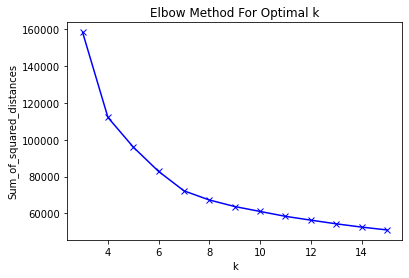

In [596]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
plt.plot(range(3, 16), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [597]:
from sklearn.cluster import KMeans
km_vec = KMeans(n_clusters=4, random_state=42)
km_vec.fit(X_vec_sc)

KMeans(n_clusters=4, random_state=42)

In [598]:
sample_silhouette_values = silhouette_samples(X_vec_sc, km_vec.labels_)
print(f"Silhouette values:")
silhouette_values = []
for i in range(4):
    cluster_silhouette_values = sample_silhouette_values[km_vec.labels_ == i]
    silhouette_values.append(
        (
            i,
            cluster_silhouette_values.shape[0],
            cluster_silhouette_values.mean(),
            cluster_silhouette_values.min(),
            cluster_silhouette_values.max(),
        )
    )
silhouette_values = sorted(
    silhouette_values, key=lambda tup: tup[2], reverse=True
)
for s in silhouette_values:
    print(
        f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
    )

Silhouette values:
    Cluster 2: Size:199 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 0: Size:3606 | Avg:0.42 | Min:0.04 | Max: 0.59
    Cluster 1: Size:1108 | Avg:0.38 | Min:-0.10 | Max: 0.58
    Cluster 3: Size:2196 | Avg:0.27 | Min:-0.08 | Max: 0.50


In [599]:
km_vec.cluster_centers_

array([[ 6.21784141e-01,  2.98156642e-01, -6.75867899e-01,
        -4.86762681e-01,  5.16423039e-01,  1.87285104e-02,
         7.05815560e-01,  5.31283408e-01, -1.97999241e-01,
         1.69073854e-01, -5.73381882e-01,  4.64597742e-03,
        -6.72494504e-01,  1.10680454e-01,  8.31262375e-02,
         1.28262071e-01, -6.88776768e-01,  1.59548621e-01,
         2.43737920e-01, -2.87749036e-01,  6.69893442e-01,
         5.54963204e-01,  6.64555150e-01,  1.98821895e-01,
         6.59475745e-01, -6.33429684e-01,  4.28016514e-01,
        -6.28132213e-01, -3.03534975e-01, -3.96088120e-01,
         4.29679264e-01,  5.31117529e-01,  5.86720170e-01,
        -5.22870592e-01, -5.91080990e-01,  3.72882765e-01,
         1.44299891e-02, -6.97929015e-01, -2.98970251e-01,
        -4.01994573e-01,  6.42291315e-01,  2.41537622e-01,
         3.24531440e-01, -6.86754294e-01,  7.01085293e-01,
         7.31901512e-01,  1.35364209e-01, -7.37235443e-01,
         6.43368589e-01, -4.14156413e-01,  3.22127689e-0

In [600]:
df_vec['km']=km_vec.labels_

In [601]:
df_vec['km'].value_counts()

0    3606
3    2196
1    1108
2     199
Name: km, dtype: int64

In [609]:
df_vec[df_vec['km'] == 0]

In [603]:
#https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/
print("Most representative terms per cluster (based on centroids):")
for i in range(4):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar([km_vec.cluster_centers_[i]], topn=20)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: home office employee work many life pandemic space tip hybrid back return would people make day year workplace meeting look 
Cluster 1: engineer compensation senior competitive stack software developer role remote hiring apply full name manager check opportunity type lead friend salary 
Cluster 2: engineer competitive compensation stack senior software developer role apply full hiring remote name type home manager office salary medium check 
Cluster 3: engineer senior compensation stack software developer competitive apply hiring remote role full manager opportunity friend check name lead platform looking 


In [604]:
from sklearn.neighbors import KDTree;

def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [605]:
top_words = get_top_words(model.wv.index_to_key, 20, km_vec.cluster_centers_, model.wv.vectors);


In [606]:
top_words

,Cluster #0,Cluster #1,Cluster #2,Cluster #3
1,home,engineer,engineer,engineer
2,office,compensation,competitive,senior
3,employee,senior,compensation,compensation
4,work,competitive,stack,stack
5,many,stack,senior,software
6,life,software,software,developer
7,pandemic,developer,developer,competitive
8,space,role,role,apply
9,tip,remote,apply,hiring
10,hybrid,hiring,full,remote


In [607]:
test_cluster = 2
most_representative_docs = np.argsort(
    np.linalg.norm(X_vec_sc - km_vec.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:10]:
    print(df_vec['tweets'][d], df_vec['polarity'][d])
    print("-------------")

💰 Deal Of The Day 💰

Union &amp; Scale FlexFit Dexley Mesh Task Chair

Only $120  @ Staples (MSRP $289)

Deal Info: https://t.co/KYkutpAWIV

#Shopping #giftideas #Deal #Deals #DealOfTheDay #DailyDeal #Sales #Clearance #Couponing #homeoffice #workfromhome #pcmr #pcgaming #gaming https://t.co/GKgaKau0lt 0
-------------
In this Science 4-Hire podcast episode, @charleshandler is joined by @RecruitingDaily’s @WilliamTincup. See where we’ve landed on their predictions for the #LaborMarket, #RemoteWork, #tech and the #HumanExperience at #work. https://t.co/7VysU5ybFe 0
-------------
Proposed oak orangery sketch proposal for a site in Ercall Heath. Await client feedback @ShrewsburyHour @TheBearSteps @Shrewsbury_Post @Shropshire_Hour @Shropshire_Post @shropshirelive @soshropshire #architecture #quality  #WorkFromHome  @TelfordHour @LoveWellington1 https://t.co/UOT27AIKiU 0
-------------
Wind Technician–Shooting Star (Mullinville, KS) Sign-on Bonus Available!
from GE
#WorkFromHome #Hiring
https:

### CV

In [517]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
X = originaltweets['cleaned_tweets']
cv = CountVectorizer(max_features=3500) 
X_cv = cv.fit_transform(X.astype('U'))  

In [613]:
cosine_sim_matrix

array([[1.        , 0.09567297, 0.21535276, ..., 0.        , 0.        ,
        0.17025131],
       [0.09567297, 1.        , 0.11846978, ..., 0.17342199, 0.        ,
        0.09365858],
       [0.21535276, 0.11846978, 1.        , ..., 0.        , 0.0860663 ,
        0.21081851],
       ...,
       [0.        , 0.17342199, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0860663 , ..., 0.        , 1.        ,
        0.        ],
       [0.17025131, 0.09365858, 0.21081851, ..., 0.        , 0.        ,
        1.        ]])

In [518]:
X.shape

(7109,)

In [519]:
len(cv.get_feature_names())

3500

In [520]:
X_cv_df = pd.DataFrame(X_cv.toarray(), columns = cv.get_feature_names())

In [521]:
X_cv_df.shape

(7109, 3500)

In [522]:
df = pd.concat([originaltweets, X_cv_df], axis=1)

In [523]:
df = df.reset_index(drop=True)

In [524]:
df.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,ability,able,absence,...,yesterday,yoga,york,young,younger,youtube,zero,zoho,zone,zoom
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal mean need remote t...,"New York, NY",US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open excellent report remote advert ...,Sydney | Hong Kong | Singapore,HK,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,tool save google meet tool created love want know,"Duluth, GA",US,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1416178372296675331,2021-07-16 23:30:09+00:00,Would you consider outsourcing a project to so...,would consider outsourcing project someone nev...,Global,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [525]:
cv_col = df.columns[7:]
cv_col_names = df[cv_col]

In [526]:
X_cv=cv_col_names
sc = StandardScaler()
X_cv_sc = sc.fit_transform(X_cv)
X_cv_sc[0:1]

array([[-0.0617453 , -0.07624593, -0.01591428, ..., -0.02054698,
        -0.05837525, -0.09166762]])

In [527]:
X_cv.head()

,ability,able,absence,absolute,absolutely,academia,accelerate,accelerated,accept,accepting,...,yesterday,yoga,york,young,younger,youtube,zero,zoho,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [514]:
from sklearn.cluster import KMeans
km_cv = KMeans(n_clusters=4, random_state=42)
km_cv.fit(X_cv_sc)

KMeans(n_clusters=4, random_state=42)

In [528]:
Sum_of_squared_distances=[]
for n in range(3, 16):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_cv_sc)
    print(n,silhouette_score(X_cv_sc, kmeans.labels_))
    Sum_of_squared_distances.append(kmeans.inertia_)

3 -0.0380216134652621
4 -0.0566933250481109
5 0.03806123410918198
6 -0.05895952667564836
7 -0.0721601455577865
8 -0.08688690209134788
9 -0.003660343889287317
10 -0.051873540217136666
11 -0.03842122003359266
12 -0.040831627651269
13 -0.03401436564534404
14 -0.13479305131927533
15 -0.07675634287880155


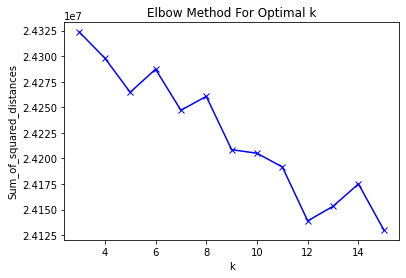

In [516]:
import matplotlib.pyplot as plt

plt.plot(range(3, 16), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [259]:
km_cv.cluster_centers_

array([[-0.05370029, -0.06334373, -0.01668367, ..., -0.01668367,
        -0.05022671, -0.08211041],
       [ 0.00043687,  0.00051533,  0.00013573, ...,  0.00013573,
         0.00040861,  0.000668  ],
       [-0.05370029, -0.06334373, -0.01668367, ..., -0.01668367,
        -0.05022671, -0.08211041],
       [-0.05370029, -0.06334373, -0.01668367, ..., -0.01668367,
        -0.05022671, -0.08211041]])

In [260]:
df['km']=km_cv.labels_

In [261]:
df['km'].value_counts()

1    10694
2       65
0       19
3        3
Name: km, dtype: int64

In [262]:
silhouette_score(X_cv_sc, km_cv.labels_)

0.04169385979130381

In [263]:
df[df['km'] == 3]

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,ability,able,abroad,...,young,younger,youth,youtube,zdnet,zero,zoho,zone,zoom,km
2906,1414648031744516102,2021-07-12 18:09:08+00:00,"Come help build a spot-market for hashrate, no...",come help build spot market hashrate dissimila...,Remote,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7264,1416524641888256002,2021-07-17 22:26:07+00:00,"Come help build a spot-market for hashrate, no...",come help build spot market hashrate dissimila...,Remote,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7266,1416523133180383237,2021-07-17 22:20:07+00:00,"Come help build a spot-market for hashrate, no...",come help build spot market hashrate dissimila...,London | New York,US,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [264]:
df[df['km'] == 3]['cleaned_tweets'].value_counts()

come help build spot market hashrate dissimilar compute power version henry remote cloud infrastructure engineer kubernetes                                1
come help build spot market hashrate dissimilar compute power version henry remote data engineer equity                                                    1
come help build spot market hashrate dissimilar compute power version henry check this remote data engineer role working with data elasticsearch hadoop    1
Name: cleaned_tweets, dtype: int64

In [265]:
word_frequencies_by_cluster = df.groupby('km').sum()

In [266]:
word_frequencies_by_cluster.head()

,tweet_id,polarity,ability,able,abroad,absence,absolutely,academia,accelerate,accelerated,...,yorker,young,younger,youth,youtube,zdnet,zero,zoho,zone,zoom
km,,,,,,,,,,,,,,,,,,,,,
0,2.689141e+19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.514698e+22,5244.0,31.0,45.0,3.0,4.0,12.0,5.0,4.0,13.0,...,3.0,19.0,4.0,3.0,39.0,3.0,35.0,3.0,29.0,76.0
2,9.207637e+19,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.247696e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
#https://stackoverflow.com/questions/27889873/clustering-text-documents-using-scikit-learn-kmeans-in-python
print("Top terms per cluster:")
order_centroids = km_cv.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(4):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print( ' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 warn
 horizon
 putting
 staying
 cyber
 potential
 secure
 risk
 expert
 contact
 anywhere
 pandemic
 tip
 help
 employee
 work
 miller
 corp
 consulting
 industrial
Cluster 1:
 apply
 hiring
 remotely
 today
 working
 manager
 developer
 product
 start
 customer
 great
 post
 stay
 money
 week
 look
 experience
 opportunity
 competitive
 lead
Cluster 2:
 small
 effort
 rabbitrun
 bureaucracy
 sized
 business
 decided
 baby
 owner
 patio
 enjoyable
 kitchen
 located
 teamwork
 purpose
 folding
 writes
 yellow
 newport
 scalable
Cluster 3:
 dissimilar
 hashrate
 compute
 henry
 version
 spot
 elasticsearch
 power
 market
 build
 come
 kubernetes
 data
 infrastructure
 equity
 help
 engineer
 cloud
 role
 remote


In [ ]:
test_cluster = 29
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(docs[d])
    print("-------------")

### TFIDF

In [547]:
#https://stackoverflow.com/questions/37593293/how-to-get-tfidf-with-pandas-dataframe
X = originaltweets['cleaned_tweets']
tfidf = TfidfVectorizer(max_features=5000)

In [548]:
X_tfidf = tfidf.fit_transform(X.values.astype('U'))

In [549]:
len(tfidf.get_feature_names())

5000

In [550]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns = tfidf.get_feature_names())

In [551]:
df1 = pd.concat([originaltweets, X_tfidf_df], axis=1)

In [552]:
df1 = df1.reset_index(drop=True)

In [553]:
df1.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,ababa,abandon,ability,...,zazpi,zdnet,zealand,zero,zoho,zombie,zone,zoom,zooming,zubair
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal mean need remote t...,"New York, NY",US,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open excellent report remote advert ...,Sydney | Hong Kong | Singapore,HK,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,tool save google meet tool created love want know,"Duluth, GA",US,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1416178372296675331,2021-07-16 23:30:09+00:00,Would you consider outsourcing a project to so...,would consider outsourcing project someone nev...,Global,None,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [554]:
tfidf_col = df1.columns[7:]
tfidf_col_names = df1[tfidf_col]

In [555]:
X_tfidf=tfidf_col_names
sc = StandardScaler()
X_tfidf_sc = sc.fit_transform(X_tfidf)
X_tfidf_sc[0:1]

array([[-0.01677002, -0.01676414, -0.0604761 , ..., -0.09039859,
        -0.0165155 , -0.01186114]])

In [559]:
from sklearn.cluster import KMeans
km_tfidf = KMeans(n_clusters=5, random_state=42)
km_tfidf.fit(X_tfidf_sc)

KMeans(n_clusters=5, random_state=42)

In [557]:
Sum_of_squared_distances=[]
for i in range(3, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_tfidf_sc)
    print(i,silhouette_score(X_tfidf_sc, kmeans.labels_))
    Sum_of_squared_distances.append(kmeans.inertia_)

3 -0.06683750457031967
4 0.005108864484592709
5 0.14337187880909505
6 -0.07489727184344847
7 -0.013525746784615168
8 -0.08291952111408205
9 -0.07115827180313228
10 -0.06797805923840985
11 -0.08602704224247827
12 -0.11064835515411978
13 -0.02520145409554671
14 -0.10421395319869951
15 -0.08488557289272242


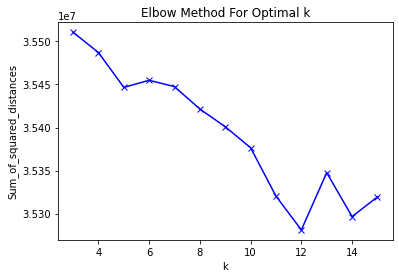

In [558]:
import matplotlib.pyplot as plt

plt.plot(range(3, 16), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [560]:
km_tfidf.cluster_centers_

array([[-1.67700220e-02, -1.67641411e-02, -6.04761026e-02, ...,
        -9.03985894e-02, -1.65154998e-02, -1.18611361e-02],
       [ 1.88931384e-05,  1.88865130e-05,  6.81324913e-05, ...,
         1.01843221e-04,  1.86063933e-05,  1.33627784e-05],
       [-1.67700220e-02, -1.67641411e-02, -6.04761026e-02, ...,
        -9.03985894e-02, -1.65154998e-02, -1.18611361e-02],
       [-1.67700220e-02, -1.67641411e-02, -6.04761026e-02, ...,
        -9.03985894e-02, -1.65154998e-02, -1.18611361e-02],
       [-1.67700220e-02, -1.67641411e-02, -6.04761026e-02, ...,
        -9.03985894e-02, -1.65154998e-02, -1.18611361e-02]])

In [561]:
df1['km']=km_tfidf.labels_

In [562]:
df1['km'].value_counts()

1    7101
3       3
2       2
4       2
0       1
Name: km, dtype: int64

In [563]:
silhouette_score(X_tfidf_sc, km_tfidf.labels_)

0.14337187880909505

In [564]:
word_frequency_by_cluster = df1.groupby('km').sum()

In [565]:
word_frequency_by_cluster.head()

,tweet_id,polarity,ababa,abandon,ability,able,abroad,abrupt,absence,absolute,...,zazpi,zdnet,zealand,zero,zoho,zombie,zone,zoom,zooming,zubair
km,,,,,,,,,,,,,,,,,,,,,
0,1.417923e+18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.339831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1.005760e+22,3161.0,0.778629,0.793609,7.182018,11.570088,0.778317,0.929523,1.044449,1.072893,...,0.815552,0.386209,0.872718,8.306356,1.208722,0.510864,8.215152,17.795124,1.064711,0.66461
2,2.833610e+18,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,4.248708e+18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,2.833775e+18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.204952,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [566]:
print("Top terms per cluster:")
order_centroids = km_tfidf.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(14):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print( ' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 zdnet
 stealing
 malware
 password
 repair
 window
 profile
 search
 result
 distributed
 computer
 link
 free
 software
 tempered
 toil
 subtle
 toiletry
 exhibition
 thrived
Cluster 1:
 remote
 apply
 check
 team
 hiring
 engineer
 remotely
 make
 help
 looking
 full
 need
 join
 opportunity
 read
 today
 learn
 people
 work
 senior
Cluster 2:
 authorised
 investigation
 denying
 particularly
 held
 evidence
 digging
 closer
 safely
 continued
 affected
 arrangement
 colleague
 said
 photo
 worker
 safe
 friday
 task
 made
Cluster 3:
 pensioner
 sunak
 severe
 raiding
 scandalous
 pension
 raid
 rishi
 backlash
 april
 paul
 avoiding
 peter
 attempt
 typical
 stop
 face
 increase
 must
 subtle
Cluster 4:
 emission
 carbon
 contributes
 turning
 camera
 commuting
 forbes
 small
 tech
 zero
 instead
 news
 increased
 practice
 could
 video
 give
 call
 business
 want
Cluster 5:


IndexError: index 5 is out of bounds for axis 0 with size 5